In [6]:
#Check the enviroment that Jupyter is using:
#import sys
#sys.executable

import numpy as np
#Machine learning library:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#NOTE on scikit-learn: Is used for typical Machine Learning Algorihms and not Deep-learning.

#Image processing library:
from skimage import io, color
'''
#Tensorflow libraries: 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
'''
#Plotting library:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#CSV handler: https://docs.python.org/3/library/csv.html 
import csv
#Web handler: https://pypi.org/project/requests/
import requests 
# https://pandas.pydata.org/ 
import pandas as pd 
#Pillow library for images: https://pypi.org/project/Pillow/
from PIL import Image
#BytesIO: https://docs.python.org/3/library/io.html
from io import BytesIO
import io
#For concurrency and asynchronous operation
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor
import threading
import multiprocessing
from multiprocessing import Pool, cpu_count, Lock, Manager, process
#Counter for counting elements and unique elements
from collections import Counter
#OS file manipulation
import os 
import platform
#Math operations
import math
#Run another async loop inside Jupyter
import shutil
import seaborn as sns

Total number of image dimensions: 346721


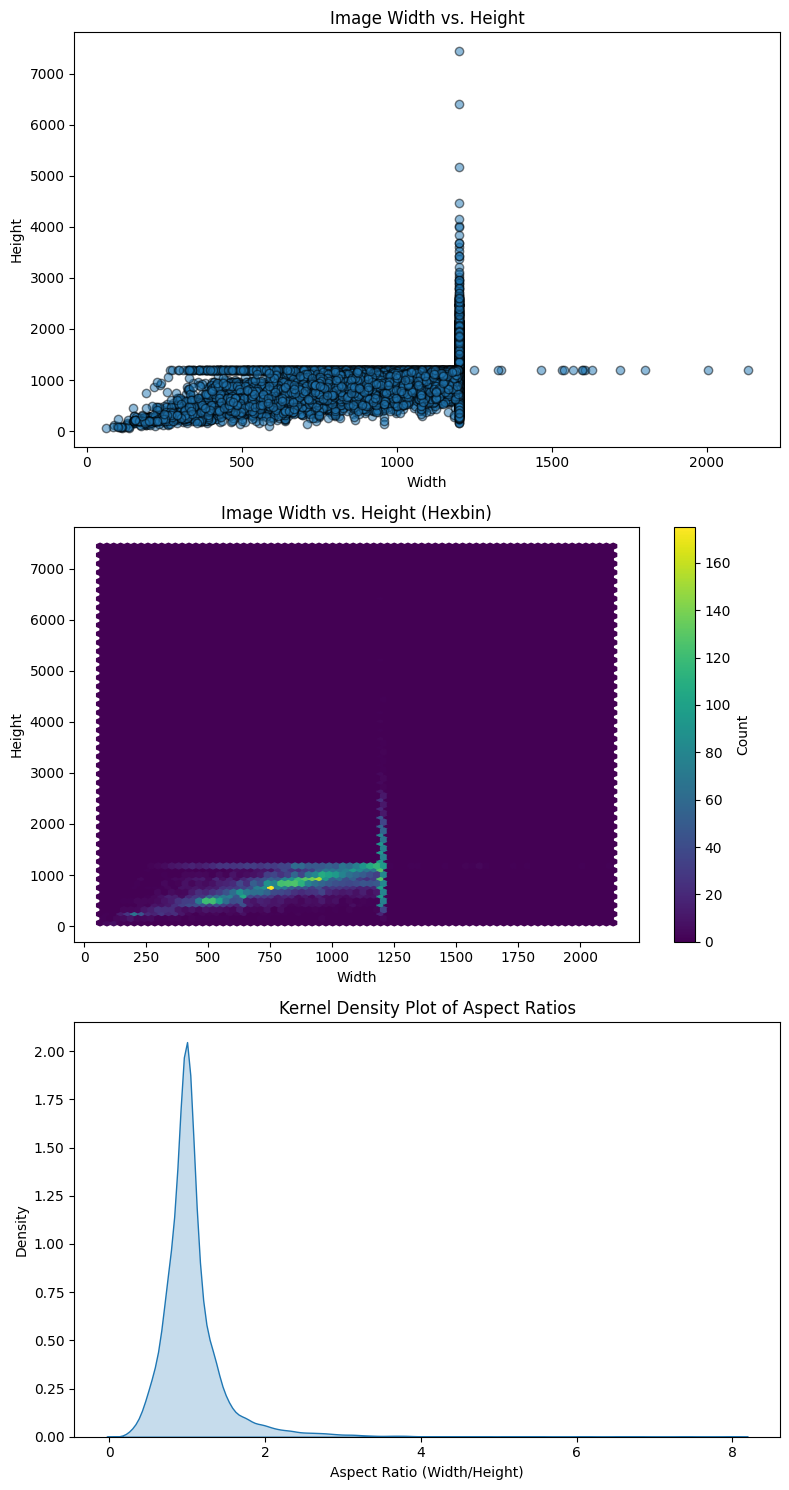

In [7]:
# Read and plot the image sizes of the original full dataset

# Replace with your file path
file_path = '/home/magnusjsc/Skrivebord/Classification-and-3D-reconstruction-of-archaeological-artifacts/python_scripts/processed_images_dimensions.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Sum of total images
total_occurrences = df['Occurrences'].sum()
print(f'Total number of image dimensions: {total_occurrences}')

# Log scale the 'Occurrences' column - More precision for large amount of data points
df['Log_Occurrences'] = np.log(df['Occurrences'])

# Calculate the 'Dimensions' column by combining 'Width' and 'Height
df['Dimensions'] = df['Width'].astype(str) + 'x' + df['Height'].astype(str)

# Calculate the 'Aspect Ratio' column
df['Aspect Ratio'] = df['Width'] / df['Height']

# Plot the figures ontop of eachother. 3 rows with 1 plot in each
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15))

# Plot image width vs. height
ax1.scatter(df['Width'], df['Height'],edgecolor='k' ,alpha=0.5)
ax1.set_title('Image Width vs. Height')
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')

# Create a hexbin plot for image width vs. height
hb = ax2.hexbin(df['Width'], df['Height'], gridsize=75, cmap='viridis')
ax2.set_title('Image Width vs. Height (Hexbin)')
ax2.set_xlabel('Width')
ax2.set_ylabel('Height')
# Add a colorbar to the hexbin plot
cb = plt.colorbar(hb)
cb.set_label('Count')
# Set the x-axis locator and formatter for the hexbin plot
ax2.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
ax2.xaxis.set_major_formatter(plt.ScalarFormatter())

# Create a KDE plot for aspect ratios
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html 
sns.kdeplot(df['Aspect Ratio'], ax=ax3, fill=True)
ax3.set_title('Kernel Density Plot of Aspect Ratios')
ax3.set_xlabel('Aspect Ratio (Width/Height)')

# Display the plots side by side
plt.tight_layout()
plt.show()

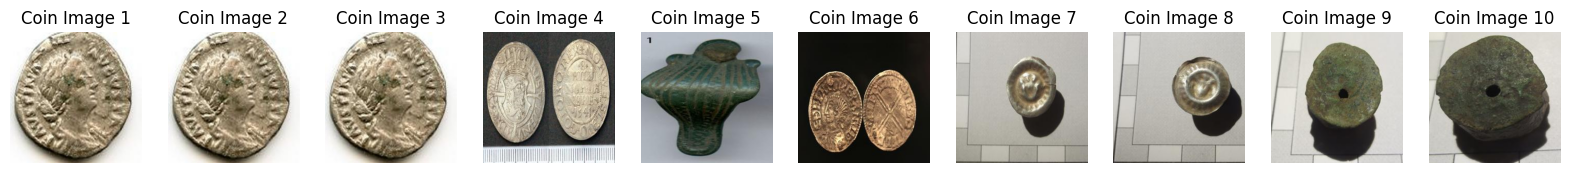

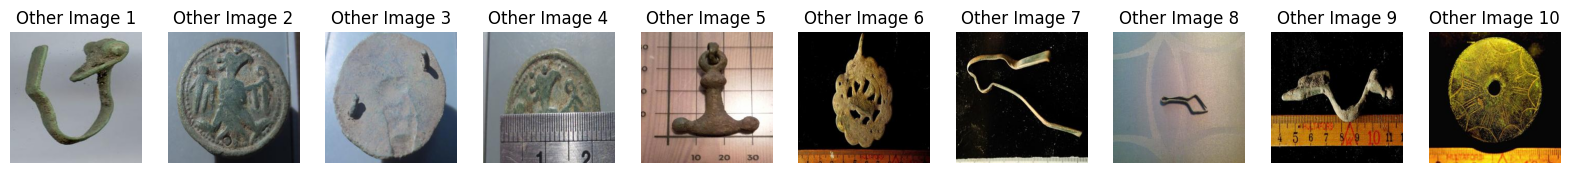

In [12]:
# Display the 10 coin images and 10 others images - how they look like

coin_path = '/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_coin_256x256/'
others_path = '/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_others_256x256/'

num_coin_images_to_display = 10
num_others_image_to_display = 10

#Create subplot
fig, axes = plt.subplots(1, num_coin_images_to_display, figsize=(20, 5))  # Adjust the figure(s) size as needed
fig2, axes2 = plt.subplots(1, num_others_image_to_display, figsize=(20, 5))

coin_files = os.listdir(coin_path)

# Load and display the first 10 coin images
for i in range(num_coin_images_to_display):
    image_path = os.path.join(coin_path, coin_files[i])  
    image = mpimg.imread(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f'Coin Image {i + 1}')
    axes[i].axis('off')

others_files = os.listdir(others_path)

# Load and display the first 10 images from the "others" category
for i in range(num_others_image_to_display):
    image_path = os.path.join(others_path, others_files[i]) 
    image = mpimg.imread(image_path)
    axes2[i].imshow(image)
    axes2[i].set_title(f'Other Image {i + 1}')
    axes2[i].axis('off')

Size of data_coins 10000 : Size of labels_coins 10000
Size of data_others 10000 : Size of labels_others 10000


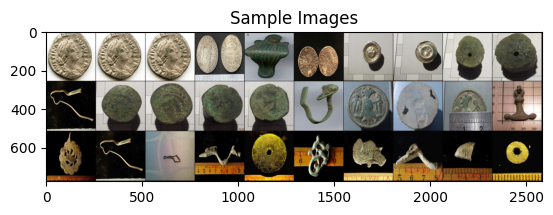

In [1]:
# Load data from external source
import os
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torchvision
import numpy as np

# Docs:
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html?highlight=dataloader

# 256x256 images
path_to_coins = "/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_coin_256x256/"
path_to_others = "/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_others_256x256/"

def load_data_from_directory_with_limit(directory_path, label, limit=10000):
    data = []
    labels = []
    count = 0

    for filename in os.listdir(directory_path):
        if filename.endswith(".jpg"): 
            image_path = os.path.join(directory_path, filename)
            image = read_image(image_path)

            # Check if the image is RGB
            if image.shape[0] == 3:
                data.append(image)
                labels.append(label)
                count += 1

            if count >= limit:
                break

    return data, labels # Tuple

# Load data call
data_coins, labels_coins = load_data_from_directory_with_limit(path_to_coins, label=0, limit=10000)
data_others, labels_others = load_data_from_directory_with_limit(path_to_others, label=1, limit=10000)

print(f'Size of data_coins {len(data_coins)} : Size of labels_coins {len(labels_coins)}')
print(f'Size of data_others {len(data_others)} : Size of labels_others {len(labels_others)}')

def imshow_grid(images, num_images=30):
    grid = torchvision.utils.make_grid(images[:num_images], nrow=10)
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.title('Sample Images')
    plt.axis('on')
    plt.show()

num_images_to_display_per_category = 15
data_to_display = data_coins[:num_images_to_display_per_category] + data_others[:num_images_to_display_per_category]
imshow_grid(data_to_display, num_images=num_images_to_display_per_category * 2)

In [2]:
import os
from torch.utils.data import Dataset, DataLoader, ConcatDataset, random_split
from torchvision import transforms
from torchvision.io import read_image
import torch
import torchvision
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import numpy as np

class customDataset(Dataset):
    def __init__(self, tensors, transform=None):
        # Check the sizes of data and labels match
        assert all(tensors[0].size(0)==t.size(0) for t in tensors), "Size mismatch between tensors"

        # Assign input
        self.tensors = tensors
        self.transform = transform

    # What to do when we want an item from the dataset
    def __getitem__(self, index):
        # Return the transformed version of x if there are transforms
        if self.transform:
            x = self.transform(self.tensors[0][index])
        else: 
            x = self.tensors[0][index]

        # And return the label too
        y = self.tensors[1][index].view(1) # Convert y to a single-element tensor

        return x,y # Return the data as a tuple (data,label)

    def __len__(self):
        return self.tensors[0].size(0)


# Create a list of  transforms
imgTrans = transforms.Compose(
    [
        transforms.ToPILImage(), # PIL = library for images - Works for several transformations. To PIL image type
        transforms.RandomVerticalFlip(p=.5),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor() # Transform the image to PyTorch tensor and normalizes the data [0;1] - Last 
    ]
)

# To Torch tensors
coin_dataT = torch.stack(data_coins)
coin_labelsT = torch.tensor(labels_coins)
other_dataT = torch.stack(data_others)
other_labelsT = torch.tensor(labels_others)

# For the Coin dataset
coin_data_transformed_defined = customDataset(tensors=(coin_dataT, coin_labelsT), transform=imgTrans)
# For the Other dataset
other_data_transformed_defined = customDataset(tensors=(other_dataT, other_labelsT), transform=imgTrans)
# Combine these two above datasets
combined_dataset_transformed_defined = ConcatDataset([coin_data_transformed_defined, other_data_transformed_defined])

# Split the data for training, validation, and testing
training = 0.7
validation = 0.15
testing = 0.15

total_size = len(combined_dataset_transformed_defined)
train_size = int(training * total_size)
val_size = int(validation * total_size)
test_size = total_size - train_size - val_size

# Randomly split the full dataset into training, validation and testing sets
train_set, val_set, test_set = random_split(combined_dataset_transformed_defined, [train_size, val_size, test_size])

# Hyperparameter - Batch size 
BATCH_SIZE = 30
# Create data loaders for each set
coin_loader = DataLoader(coin_data_transformed_defined, batch_size=BATCH_SIZE, shuffle=False) # For test below cell
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True) # Shuffle the training set
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)

print(f'Total number of elements in train_loader: {len(train_loader) * BATCH_SIZE} : Each batch size {len(train_loader)}')
print(f'Total number of elements in val_loader: {len(val_loader) * BATCH_SIZE} : Each batch size {len(val_loader)}')
print(f'Total number of elements in test_loader: {len(test_loader) * BATCH_SIZE} : Each batch size {len(test_loader)}')

Total number of elements in train_loader: 14010 : Each batch size 467
Total number of elements in val_loader: 3000 : Each batch size 100
Total number of elements in test_loader: 3000 : Each batch size 100


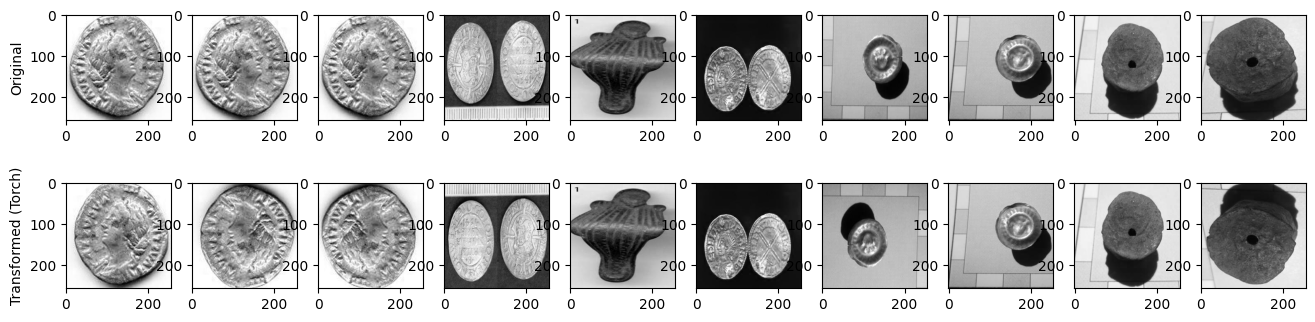

In [3]:
# Get a mini-batch from the train_loader and show differences before and after transformation
# Get the first 10 images from the train_loader
X, y = next(iter(coin_loader))

fig, axs = plt.subplots(2, 10, figsize=(16, 4))

# Loop over the first 10 images
for i in range(10):
    # Original images
    axs[0, i].imshow(coin_dataT[i, 0, :, :].detach().numpy(), cmap='gray')
    # Transformed images
    axs[1, i].imshow(X[i, 0, :, :].detach().numpy(), cmap='gray')

# Set labels
axs[0, 0].set_ylabel('Original')
axs[1, 0].set_ylabel('Transformed (Torch)')

plt.show()

In [4]:
# Pytorch CNN: 
import torch
import torchvision
import torch.nn as nn 
import torch.nn.functional as F # Functions like ReLu
from torchsummary import summary # Get model behavior during training
import numpy as np

# Docs: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

initnumOfChannels = 3 # RGB - 3 channels
totalnumOfclasses = 1 # (Coin||-Coin)

def createTheCoinClassifier(printtoggle=False):
    class CoinClassifier(nn.Module):
        def __init__(self, printtoggle=False):
            super().__init__()
            self.print = printtoggle

            print('Coin Classifier properties: ')
            print('--------------------------------------------')
            # CNN Block - NOTE: Conv is a linear operation -> Remember ReLu: 
            # First layer init: 3 input channel image, 6 output channels, 3x3 square conv. kernel
            self.conv1 = nn.Conv2d(in_channels=initnumOfChannels, out_channels=10, kernel_size=(5,5), stride=3, padding=1) # out: number of output feature maps (One for each kernel i.e. also 15 kernels)
            print(f'First conv layer (weight): {self.conv1.weight.shape}')
            print(f'First conv layer (bias): {self.conv1.bias.shape}') # Total size (summed) of bias for kernels -> number
            
            # Size of output feature map (MATH): floor(imageSize + 2 * padding - sizeOfKernel) / Stride + 1
            print(f'Size of output feature map - first layer: {np.floor((256 + 2 * 1 - 5 ) / 3 ) + 1}')
            
            self.maxpool1 = nn.MaxPool2d(kernel_size=(2,2), stride=2)
            # Size after maxpool (MATH) floor(imageSize + 2 * padding - sizeOfKernel) / Stride + 1 / 2
            print(f'Size of output from pooling - first layer: {np.floor((((256 + 2 * 1 - 5) / 3) + 1) / 2)}') # Size of output after pooling (/2 - maxpool)
            
            # Second layer init
            self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(5,5), stride=2, padding=1) 
            print(f'Second conv layer (weight): {self.conv2.weight.shape}')
            print(f'Second conv layer (bias): {self.conv2.bias.shape}')
            print(f'Size of output feature map - second layer: {np.floor((42 + 2 * 1 - 5) / 2 ) + 1}')
            
            self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2), stride=2)
            print(f'Size of output from pooling - second layer: {np.floor((((42 + 2 * 1 - 5) / 2) + 1) / 2)}')
    
            # Calculate the expected size for the FFN/FCL
            expectSize = np.floor((10 + 2 * 0 - 1) / 1) + 1
            expectSize = 20 * int(expectSize**2)
            print(f'Expected size for the FC layer - All feature maps flattened: {expectSize}')
    
            # FFN Block
            self.fc1 = nn.Linear(in_features=expectSize, out_features=500)
            self.fc2 = nn.Linear(in_features=500, out_features=totalnumOfclasses)
            print('--------------------------------------------')
            
        # Define how the network is connected using this forward function
        def forward(self, x):
    
            print(f'Input: {x.shape}') if self.print else None
            
            # CNN
            x = self.conv1(x)
            x = F.relu(x)  # Apply ReLU activation
            x = self.maxpool1(x)
            print(f'Layer conv1/pool1: {x.shape}') if self.print else None
    
            x = self.conv2(x)
            x = F.relu(x)  # Apply ReLU activation
            x = self.maxpool2(x)
            print(f'Layer conv2/pool2: {x.shape}') if self.print else None
            # NOTE: Output of the last conv layer is a tensor so beware before feeding it to the FNN/FCL 
    
            # Flatten the input tensor. Divide total number of elements with total number of samples
            nUnits = x.shape.numel() / x.shape[0]  
            x = x.view(-1,int(nUnits)) # -1 lets Pytorch decide size along this dimention
            print(f'Vectorize x: {x.shape}') if self.print else None
            
            # FFN/FCL
            x = self.fc1(x)
            x = F.relu(x)  # Apply ReLU activation
            print(f'Layer fc1: {x.shape}') if self.print else None
    
            x = self.fc2(x)
            print(f'Layer out: {x.shape}') if self.print else None
            return x

    # Model
    model = CoinClassifier(printtoggle)
    # Loss function
    lossFun = nn.BCEWithLogitsLoss() # BCE=−1/n​∑i=1​(y_i​log(yHat_​i​)+(1−y_i​)log(1−yHat_i​))
    # Optimizer 
    optimizer = Adam(model.parameters(), lr=.001)

    return model, lossFun, optimizer

In [8]:
# Train the model on a minibatch for testing
from torch.optim import Adam

model, lossfun, optimizer = createTheCoinClassifier(True)  # Set to False when training

# Specify the mini-batch index you want
mini_batch_index = 30  # Change this to the desired index

for i, (X, y) in enumerate(train_loader):
    if i == mini_batch_index:
        yHat = model(X)

        # Check sizes
        print(' ')
        print(f'yHat shape: {yHat.shape}')
        print(f'y shape: {y.shape}')

        # Convert y to a float tensor
        y = y.float()

        # Compute the loss
        loss = lossfun(yHat, y)
        print(' ')
        print('Loss:')
        print(loss)

    if i >= mini_batch_index:
        break

Coin Classifier properties: 
--------------------------------------------
First conv layer (weight): torch.Size([10, 3, 5, 5])
First conv layer (bias): torch.Size([10])
Size of output feature map - first layer: 85.0
Size of output from pooling - first layer: 42.0
Second conv layer (weight): torch.Size([20, 10, 5, 5])
Second conv layer (bias): torch.Size([20])
Size of output feature map - second layer: 20.0
Size of output from pooling - second layer: 10.0
Expected size for the FC layer - All feature maps flattened: 2000
--------------------------------------------
Input: torch.Size([30, 3, 256, 256])
Layer conv1/pool1: torch.Size([30, 10, 42, 42])
Layer conv2/pool2: torch.Size([30, 20, 10, 10])
Vectorize x: torch.Size([30, 2000])
Layer fc1: torch.Size([30, 500])
Layer out: torch.Size([30, 1])
 
yHat shape: torch.Size([30, 1])
y shape: torch.Size([30, 1])
 
Loss:
tensor(0.6919, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [89]:
# Pytorch CNN: 
import torch
import torchvision
import torch.nn as nn 
import torch.nn.functional as F # Functions like ReLu
from torchinfo import summary # Get model behavior during training - https://pypi.org/project/torchinfo/
import numpy as np
from torch.optim import Adam

# Docs: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
# Conv2d docs: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

initnumOfChannels = 3 # RGB - 3 channels
totalnumOfclasses = 1 # (Coin||-Coin)

def createTheCoinClassifier(printtoggle=False):
    class CoinClassifier(nn.Module):
        def __init__(self, printtoggle=False):
            super().__init__()
            self.print = printtoggle

            print('Coin Classifier properties: ')
            print('--------------------------------------------')
            # CNN Block - NOTE: Conv is a linear operation -> Remember ReLu: 
            # First layer init: 3 input channel image, 6 output channels, 3x3 square conv. kernel. Learnable Bias (True). Groups of 1 i.e. on Conv layer at a time seeing the input.
            # Padding is added to all 4 sides.
            self.conv1 = nn.Conv2d(
                in_channels=initnumOfChannels, 
                out_channels=20, 
                kernel_size=(5,5), 
                stride=3, 
                padding=1, 
                padding_mode='zeros', 
                bias=True, 
                groups=1
            ) # out_channels: number of output feature maps (One for each kernel i.e. also 15 kernels)
            print(f'First conv layer (weight): {self.conv1.weight.shape}')
            print(f'First conv layer (bias): {self.conv1.bias.shape}') # Total size (summed) of bias for kernels -> number
            
            # Size of output feature map (MATH): floor(imageSize + 2 * padding - sizeOfKernel) / Stride + 1
            print(f'Size of output feature map - first layer: {np.floor((256 + 2 * 1 - 5) / 3 ) + 1}')
            
            self.maxpool1 = nn.MaxPool2d(
                kernel_size=(2,2), 
                stride=2
            )
            # Size after maxpool (MATH) floor(imageSize + 2 * padding - sizeOfKernel) / Stride + 1 / 2
            print(f'Size of output from pooling - first layer: {np.floor((((256 + 2 * 1 - 5) / 3) + 1) / 2)}') # Size of output after pooling (/2 - maxpool)

            
            # Second layer init
            self.conv2 = nn.Conv2d(
                in_channels=20, 
                out_channels=30, 
                kernel_size=(3,3), 
                stride=2, 
                padding=1, 
                padding_mode='zeros', 
                bias=True, 
                groups=1
            ) 
            print(f'Second conv layer (weight): {self.conv2.weight.shape}')
            print(f'Second conv layer (bias): {self.conv2.bias.shape}')
            print(f'Size of output feature map - second layer: {np.floor((42 + 2 * 1 - 3) / 2) + 1}')
            
            self.maxpool2 = nn.MaxPool2d(
                kernel_size=(2,2), 
                stride=2
            )
            print(f'Size of output from pooling - second layer: {np.floor((((42 + 2 * 1 - 3) / 2) + 1) / 2)}')
    
            # Calculate the expected size for the FFN/FCL
            # Number of input maps = 30, heightxwidth: 10x10 -> Number of total pixels/colomns (flattened)
            expectSize = np.floor((10 + 2 * 0 - 1) / 1) + 1 
            expectSize = 30 * int(expectSize**2) # Square to get the total number of pixels (height AND width) : 30 is the number of total features maps/inputs
            print(f'Expected size for the FC layer - All feature maps flattened: {expectSize}')
    
            # FFN Block
            self.fc1 = nn.Linear(
                in_features=expectSize, 
                out_features=500
            )
            self.fc2 = nn.Linear(
                in_features=500, 
                out_features=totalnumOfclasses
            )
            print('--------------------------------------------')
            
        # Define how the network is connected using this forward function
        def forward(self, x):
    
            print(f'Input: {x.shape}') if self.print else None
            
            # CNN
            x = self.conv1(x)
            x = F.relu(x)  # Apply ReLU activation
            x = self.maxpool1(x)
            print(f'Layer conv1/pool1: {x.shape}') if self.print else None
    
            x = self.conv2(x)
            x = F.relu(x)  # Apply ReLU activation
            x = self.maxpool2(x)
            print(f'Layer conv2/pool2: {x.shape}') if self.print else None
            # NOTE: Output of the last conv layer is a tensor so beware before feeding it to the FNN/FCL 
    
            # Flatten the input tensor. Divide total number of elements with total number of samples
            nUnits = x.shape.numel() / x.shape[0]  
            x = x.view(-1,int(nUnits)) # -1 lets Pytorch decide size along this dimention
            print(f'Vectorize x: {x.shape}') if self.print else None
            
            # FFN/FCL
            x = self.fc1(x)
            x = F.relu(x)  # Apply ReLU activation
            print(f'Layer fc1: {x.shape}') if self.print else None
    
            x = self.fc2(x)
            print(f'Layer out: {x.shape}') if self.print else None
            return x

    # Model
    model = CoinClassifier(printtoggle)
    # Loss function
    lossFun = nn.BCEWithLogitsLoss() # BCE=−1/n​∑i=1​(y_i​log(yHat_​i​)+(1−y_i​)log(1−yHat_i​))
    # Optimizer 
    optimizer = Adam(model.parameters(), lr=.001)

    return model, lossFun, optimizer

# Check parameters in the model
model = createTheCoinClassifier()
# Use summary to get model details
summary(
    model[0], 
    input_size=(BATCH_SIZE, 3, 256, 256), 
    verbose=2, 
    col_names=["kernel_size", "output_size", "num_params", "mult_adds"],
)


'''
Summary notes: 
    The number of weights is higher due to the size of features maps. 
    The bias is for each feature map, therefore a smaller number.
'''

Coin Classifier properties: 
--------------------------------------------
First conv layer (weight): torch.Size([20, 3, 5, 5])
First conv layer (bias): torch.Size([20])
Size of output feature map - first layer: 85.0
Size of output from pooling - first layer: 42.0
Second conv layer (weight): torch.Size([30, 20, 3, 3])
Second conv layer (bias): torch.Size([30])
Size of output feature map - second layer: 21.0
Size of output from pooling - second layer: 10.0
Expected size for the FC layer - All feature maps flattened: 3000
--------------------------------------------
Layer (type (var_name))                  Kernel Shape              Output Shape              Param #                   Mult-Adds
CoinClassifier (CoinClassifier)          --                        [30, 1]                   --                        --
├─Conv2d (conv1)                         [5, 5]                    [30, 20, 85, 85]          1,520                     329,460,000
│    └─weight                            [3, 20,

Layer (type (var_name))                  Kernel Shape              Output Shape              Param #                   Mult-Adds
CoinClassifier (CoinClassifier)          --                        [30, 1]                   --                        --
├─Conv2d (conv1)                         [5, 5]                    [30, 20, 85, 85]          1,520                     329,460,000
│    └─weight                            [3, 20, 5, 5]                                       ├─1,500
│    └─bias                              [20]                                                └─20
├─MaxPool2d (maxpool1)                   [2, 2]                    [30, 20, 42, 42]          --                        --
├─Conv2d (conv2)                         [3, 3]                    [30, 30, 21, 21]          5,430                     71,838,900
│    └─weight                            [20, 30, 3, 3]                                      ├─5,400
│    └─bias                              [30]                     

Coin Classifier properties: 
--------------------------------------------
First conv layer (weight): torch.Size([20, 3, 5, 5])
First conv layer (bias): torch.Size([20])
Size of output feature map - first layer: 85.0
Size of output from pooling - first layer: 42.0
Second conv layer (weight): torch.Size([30, 20, 3, 3])
Second conv layer (bias): torch.Size([30])
Size of output feature map - second layer: 21.0
Size of output from pooling - second layer: 10.0
Expected size for the FC layer - All feature maps flattened: 3000
--------------------------------------------
Epoch 1, Loss: 0.6672100821705396
Epoch 1, Validation Loss: 0.638196257352829, ROC AUC: 0.6958099594526553
Epoch 2, Loss: 0.6180066999837724
Epoch 2, Validation Loss: 0.5908013701438903, ROC AUC: 0.7474733524416476
Epoch 3, Loss: 0.5790996130324533
Epoch 3, Validation Loss: 0.5539653086662293, ROC AUC: 0.7863340414440477
Epoch 4, Loss: 0.5474989722448957
Epoch 4, Validation Loss: 0.5363453441858291, ROC AUC: 0.8047406944822518

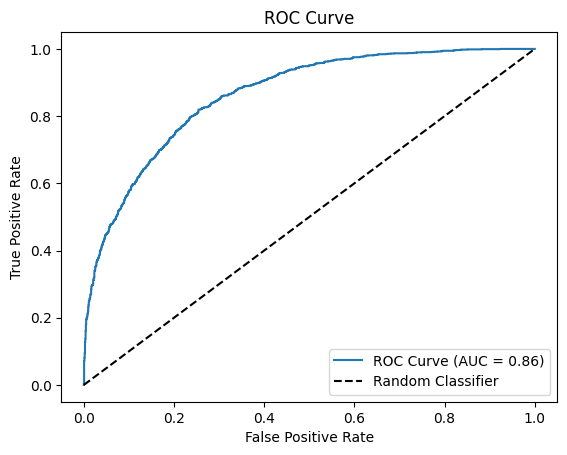

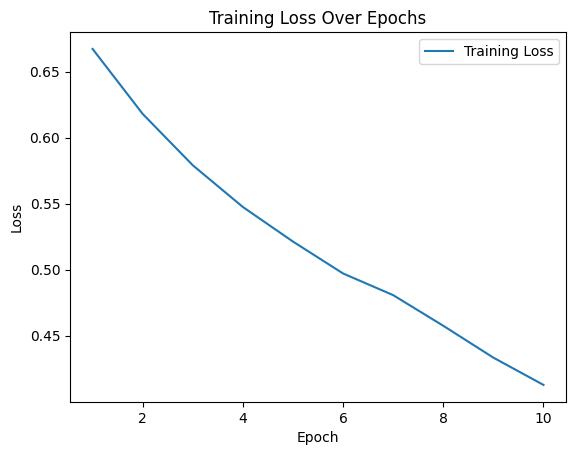

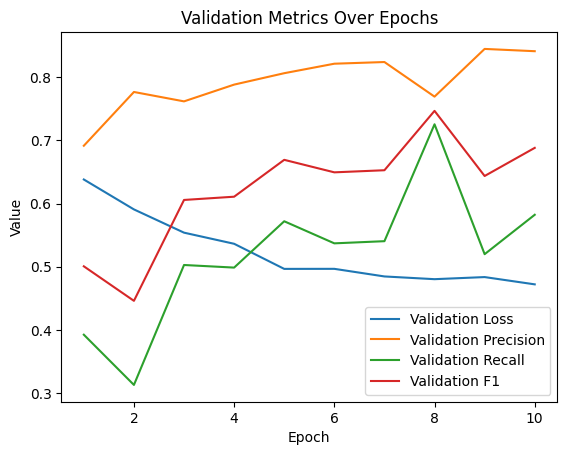

In [72]:
# Define the model
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

model, criterion, optimizer = createTheCoinClassifier()

# Lists to store training losses and validation metrics
train_losses = []

# Metrics for classification
validation_metrics = {
    "loss": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "roc_auc": []  
}

# Training loop
epochs = 10
threshold = 0.5
for epoch in range(epochs):
    running_train_loss = 0.0
    model.train()  # Set the model to training mode
    for i, data in enumerate(train_loader, 0):
        # Get inputs and labels from the data loader
        inputs, labels = data
        # Clear any previously computed gradients
        optimizer.zero_grad()
        # Forward pass - Compute model predictions using the input data
        outputs = model(inputs)
        # Ensure that labels are of float data type for BCE loss
        labels = labels.float()
        # Calculate the loss by comparing the model's predictions to the true labels
        loss = criterion(outputs, labels)
        # Backpropagate the gradients to update the model's parameters
        loss.backward()
        # Update the model's parameters (weights and biases) using the optimizer
        optimizer.step()
        # Accumulate the loss for this batch to calculate the average loss for the epoch
        running_train_loss += loss.item()

    # Calculate the average loss for this epoch
    average_loss = running_train_loss / len(train_loader)
    train_losses.append(average_loss)
    print(f"Epoch {epoch + 1}, Loss: {average_loss}")

# Validation step - For each epoch
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        running_val_loss = 0.0
        all_probs = []
    
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            labels = labels.float()
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()
    
            # Apply the threshold to get binary predictions - Normalization into binary (0||1)
            binary_preds = (outputs >= threshold).float() # Returns 1 for true and 0 if false -> Condition check
    
            # Append the true labels to all_labels - in order
            all_labels.extend(labels.tolist())
    
            # Append binary predictions to all_preds
            all_preds.extend(binary_preds.tolist()) # Predictions
    
            # Get the probability for the positive class (class 1) - For ROC. Negative y^ < 0.5 and positive if y^ > 0.5
            positive_probs = torch.sigmoid(outputs).numpy() # To numpy array - prob between [0;1] using sigmoid. Numpy is for numerical purposes
            all_probs.extend(positive_probs) # Probabilities based on output of the model
    
        average_val_loss = running_val_loss / len(val_loader)
        validation_metrics["loss"].append(average_val_loss)
        validation_metrics["precision"].append(precision_score(all_labels, all_preds))
        validation_metrics["recall"].append(recall_score(all_labels, all_preds))
        validation_metrics["f1"].append(f1_score(all_labels, all_preds))
    
        # Calculate ROC Curve - fpr = False Positive Rate, tpr = True Positive Rate
        fpr, tpr, thresholds = roc_curve(all_labels, all_probs) # Based on all probabilties and the true labels
        roc_auc = roc_auc_score(all_labels, all_probs)
        validation_metrics["roc_auc"].append(roc_auc)
    
        print(f"Epoch {epoch + 1}, Validation Loss: {average_val_loss}, ROC AUC: {roc_auc}")


# ROC Curve graph for validation
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot the training loss
plt.figure()
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Plot validation metrics over epochs
plt.figure()
for metric_name, values in validation_metrics.items():
    if metric_name != "roc_auc":
        plt.plot(range(1, epochs + 1), values, label=f'Validation {metric_name.capitalize()}')

plt.xlabel('Epoch')
plt.title('Validation Metrics Over Epochs')
plt.ylabel('Value') 
plt.legend()
plt.show()